In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import gzip
import rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import AllChem
%pylab inline
from rdkit.Chem import *
import  csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
%%bash
head -76 'Lysozyme_Concentration_Curve_Trehalose_Melibiose_Lactulose_40min_A450_25C_030719_v003.csv' | tail -49 > temp5

In [9]:
%%bash
head -42 temp5 > temp2
cut  -d "," -f 3- temp2 > temp3

In [10]:
%%bash
tr -cd '[:print:][:cntrl:]'  < temp3 > test3.csv

In [11]:
raw_data=pd.read_csv("test3.csv", index_col=False )

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 97 columns):
Time                      41 non-null object
T 450                     41 non-null float64
Blank                     41 non-null float64
Blank.1                   41 non-null float64
Blank.2                   41 non-null float64
Neg Ctrl                  41 non-null float64
Neg Ctrl.1                41 non-null float64
Neg Ctrl.2                41 non-null float64
Pos Ctrl                  41 non-null float64
Pos Ctrl.1                41 non-null float64
Pos Ctrl.2                41 non-null float64
Trehalose ( 10mM)         41 non-null float64
Trehalose ( 10mM).1       41 non-null float64
Trehalose ( 10mM).2       41 non-null float64
Trehalose ( 1 mM)         41 non-null float64
Trehalose ( 1 mM).1       41 non-null float64
Trehalose ( 1 mM).2       41 non-null float64
Trehalose ( 1E-1 mM)      41 non-null float64
Trehalose ( 1E-1 mM).1    41 non-null float64
Trehalose ( 1E-1 mM).2  

In [13]:
raw_data.head()

,Time,T 450,Blank,Blank.1,Blank.2,Neg Ctrl,Neg Ctrl.1,Neg Ctrl.2,Pos Ctrl,Pos Ctrl.1,...,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96
0,0:00:00,25.7,0.043,0.041,0.047,0.551,0.566,0.567,0.470,0.498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0:01:00,25.7,0.043,0.041,0.047,0.557,0.572,0.574,0.408,0.434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0:02:00,25.7,0.043,0.041,0.047,0.553,0.578,0.568,0.390,0.401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0:03:00,25.7,0.044,0.041,0.047,0.567,0.577,0.572,0.360,0.355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0:04:00,25.7,0.043,0.041,0.047,0.573,0.579,0.575,0.338,0.325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#remove NAN
raw_data2=raw_data.dropna(axis=1)

In [15]:
raw_data2.describe()

,T 450,Blank,Blank.1,Blank.2,Neg Ctrl,Neg Ctrl.1,Neg Ctrl.2,Pos Ctrl,Pos Ctrl.1,Pos Ctrl.2,...,Lactulose (1E-3 mM).2,Lactulose (1E-4 mM),Lactulose (1E-4 mM).1,Lactulose (1E-4 mM).2,Lactulose (1E-5 mM),Lactulose (1E-5 mM).1,Lactulose (1E-5 mM).2,Lactulose (1E-6 mM),Lactulose (1E-6 mM).1,Lactulose (1E-6 mM).2
count,41.000000,41.000000,41.000000,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,25.697561,0.043293,0.041341,4.700000e-02,0.576317,0.578122,0.576927,0.173439,0.172927,0.189732,...,0.160537,0.170561,0.242098,0.188585,0.176024,0.168805,0.167585,0.162805,0.164415,0.162073
std,0.015617,0.000461,0.000480,2.810038e-17,0.007875,0.002977,0.003771,0.102362,0.106487,0.103011,...,0.106186,0.114732,0.154700,0.107267,0.111523,0.106961,0.108814,0.106189,0.107953,0.108903
min,25.600000,0.043000,0.041000,4.700000e-02,0.551000,0.566000,0.567000,0.088000,0.086000,0.103000,...,0.077000,0.080000,0.101000,0.100000,0.085000,0.082000,0.081000,0.079000,0.079000,0.075000
25%,25.700000,0.043000,0.041000,4.700000e-02,0.573000,0.577000,0.574000,0.100000,0.098000,0.116000,...,0.085000,0.088000,0.119000,0.110000,0.095000,0.090000,0.089000,0.086000,0.086000,0.084000
50%,25.700000,0.043000,0.041000,4.700000e-02,0.578000,0.579000,0.578000,0.125000,0.123000,0.142000,...,0.108000,0.115000,0.179000,0.136000,0.123000,0.117000,0.114000,0.110000,0.112000,0.110000
75%,25.700000,0.044000,0.042000,4.700000e-02,0.582000,0.580000,0.580000,0.215000,0.215000,0.232000,...,0.203000,0.220000,0.325000,0.238000,0.224000,0.215000,0.213000,0.207000,0.209000,0.206000
max,25.700000,0.044000,0.042000,4.700000e-02,0.585000,0.583000,0.582000,0.470000,0.498000,0.497000,...,0.478000,0.509000,0.679000,0.492000,0.508000,0.459000,0.475000,0.464000,0.475000,0.478000


In [16]:
raw_data2.head()

,Time,T 450,Blank,Blank.1,Blank.2,Neg Ctrl,Neg Ctrl.1,Neg Ctrl.2,Pos Ctrl,Pos Ctrl.1,...,Lactulose (1E-3 mM).2,Lactulose (1E-4 mM),Lactulose (1E-4 mM).1,Lactulose (1E-4 mM).2,Lactulose (1E-5 mM),Lactulose (1E-5 mM).1,Lactulose (1E-5 mM).2,Lactulose (1E-6 mM),Lactulose (1E-6 mM).1,Lactulose (1E-6 mM).2
0,0:00:00,25.7,0.043,0.041,0.047,0.551,0.566,0.567,0.470,0.498,...,0.478,0.509,0.679,0.492,0.508,0.459,0.475,0.464,0.475,0.478
1,0:01:00,25.7,0.043,0.041,0.047,0.557,0.572,0.574,0.408,0.434,...,0.413,0.465,0.602,0.453,0.442,0.436,0.434,0.421,0.430,0.437
2,0:02:00,25.7,0.043,0.041,0.047,0.553,0.578,0.568,0.390,0.401,...,0.380,0.408,0.551,0.400,0.402,0.392,0.394,0.385,0.390,0.381
3,0:03:00,25.7,0.044,0.041,0.047,0.567,0.577,0.572,0.360,0.355,...,0.355,0.370,0.498,0.384,0.376,0.367,0.367,0.354,0.358,0.357
4,0:04:00,25.7,0.043,0.041,0.047,0.573,0.579,0.575,0.338,0.325,...,0.324,0.339,0.469,0.351,0.344,0.336,0.338,0.331,0.331,0.330


In [17]:
colnames=list(raw_data2)

In [18]:
colnames

['Time',
 'T 450',
 'Blank',
 'Blank.1',
 'Blank.2',
 'Neg Ctrl',
 'Neg Ctrl.1',
 'Neg Ctrl.2',
 'Pos Ctrl',
 'Pos Ctrl.1',
 'Pos Ctrl.2',
 'Trehalose ( 10mM)',
 'Trehalose ( 10mM).1',
 'Trehalose ( 10mM).2',
 'Trehalose ( 1 mM)',
 'Trehalose ( 1 mM).1',
 'Trehalose ( 1 mM).2',
 'Trehalose ( 1E-1 mM)',
 'Trehalose ( 1E-1 mM).1',
 'Trehalose ( 1E-1 mM).2',
 'Trehalose ( 1E-2 mM)',
 'Trehalose ( 1E-2 mM).1',
 'Trehalose ( 1E-2 mM).2',
 'Trehalose ( 1E-3 mM)',
 'Trehalose ( 1E-3 mM).1',
 'Trehalose ( 1E-3 mM).2',
 'Trehalose ( 1E-4 mM)',
 'Trehalose ( 1E-4 mM).1',
 'Trehalose ( 1E-4 mM).2',
 'Trehalose ( 1E-5 mM)',
 'Trehalose ( 1E-5 mM).1',
 'Trehalose ( 1E-5 mM).2',
 'Trehalose ( 1E-6 mM)',
 'Trehalose ( 1E-6 mM).1',
 'Trehalose ( 1E-6 mM).2',
 'Melibiose (10 mM)',
 'Melibiose (10 mM).1',
 'Melibiose (10 mM).2',
 'Melibiose (1 mM)',
 'Melibiose (1 mM).1',
 'Melibiose (1 mM).2',
 'Melibiose (1E-1 mM)',
 'Melibiose (1E-1 mM).1',
 'Melibiose (1E-1 mM).2',
 'Melibiose (1E-2 mM)',
 'Melibios

In [20]:
colnames[11][0:9]

'Trehalose'

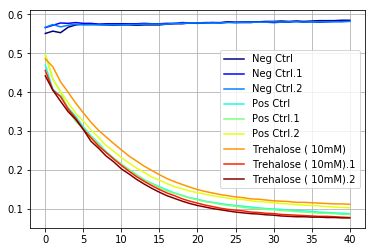

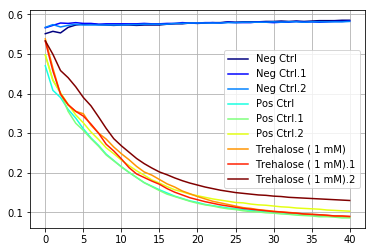

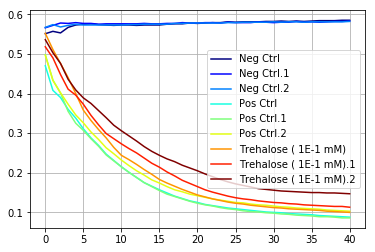

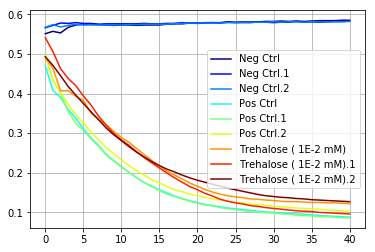

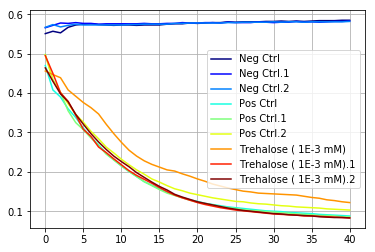

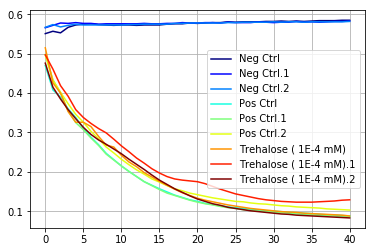

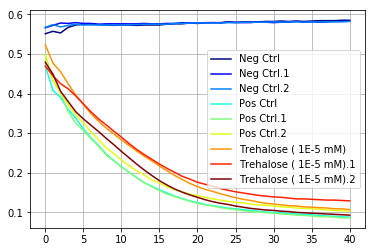

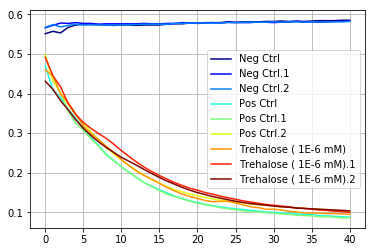

In [21]:
from __future__ import print_function
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.integrate import simps
from numpy import trapz#for j in range(1,2):
##in anaconda terminal "pip install mpld3"
%matplotlib inline
import mpld3
mpld3.enable_notebook()

 #   df_treh=raw_data2.loc[:,colnames[11:11+j*3]]
#plt.figure(figsize=(20,20)) 
NCURVES = 9
values = range(NCURVES)
#fig = plt.figure()
#plt.subplot(4,4,i)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
df_negC=raw_data2.loc[:,colnames[5:8]]
#df_negC.head()
df_posC=raw_data2.loc[:,colnames[8:11]]
#df_posC.head()
SLOPES2=[]
AUCS=[]
for i in range(1, 9):
    df1=raw_data2.loc[:,colnames[11+(i-1)*3:11+i*3]]
    
    df=pd.concat([df_negC,df_posC,df1], axis=1)
    
    #plt.figure(figsize=(7,5))
    lines = []
    num=0
    slope2=[]
    AUC=[]
    for column in df:

        line = df[column]
        colorVal = scalarMap.to_rgba(values[num])
        colorText = (
            '(%s)'%(column)
            )
        retLine = plt.plot(line,color=colorVal,label=column)
        lines.append(retLine)
        y = np.array(df.loc[5:, column])

        # Compute the area using the composite trapezoidal rule.
        area = trapz(y, dx=35)
        AUC.append(area)
        slp2= (df.loc[10, column]-df.loc[5, column])/5
        slope2.append(slp2)
        num+=1
    #added this to get the legend to work
    #handles,labels = plt.get_legend_handles_labels()
    plt.legend(df.columns, loc='best')
    plt.grid()
    plt.show()
    AUCS.append(AUC)
    SLOPES2.append(slope2)
    #print("area =", area)

    # Compute the area using the composite Simpson's rule.
    #area = simps(y, dx=40)
    #print("area =", area)
    #print("AUC=",AUC)

    

In [22]:
AUCS_treh=pd.DataFrame(AUCS).iloc[:,6:9]

In [27]:
column_list=[colnames[11][0:9],colnames[11][0:9],colnames[11][0:9]]

In [28]:
index_list=[10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]

In [29]:
AUCS_treh

,6,7,8
0,206.0975,161.9975,155.7325
1,191.0300,184.0825,230.5450
2,198.9750,220.9200,261.8700
3,228.7775,213.7800,236.6000
4,236.2150,169.8725,173.6000
5,185.5700,220.3775,181.4750
6,221.7250,237.2125,192.3425
7,187.0575,205.0825,198.1000


In [30]:
AUCS_treh.columns=column_list
AUCS_treh.index=index_list
AUCS_treh

,Trehalose,Trehalose,Trehalose
10.000000,206.0975,161.9975,155.7325
1.000000,191.0300,184.0825,230.5450
0.100000,198.9750,220.9200,261.8700
0.010000,228.7775,213.7800,236.6000
0.001000,236.2150,169.8725,173.6000
0.000100,185.5700,220.3775,181.4750
0.000010,221.7250,237.2125,192.3425
0.000001,187.0575,205.0825,198.1000


In [31]:
df_mean=AUCS_treh.iloc[:,0:3].mean(axis=1)
df_std=AUCS_treh.iloc[:,0:3].std(axis=1)
x=log10(df_mean.index)

In [32]:
df_mean

10.000000    174.609167
1.000000     201.885833
0.100000     227.255000
0.010000     226.385833
0.001000     193.229167
0.000100     195.807500
0.000010     217.093333
0.000001     196.746667
dtype: float64

TypeError: Object of type ndarray is not JSON serializable

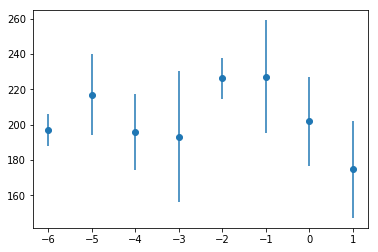

In [33]:
plt.figure()
y=np.array(df_mean)
x=np.array(x)
e=np.array(df_std)
plt.errorbar(x, y, yerr=e,  fmt='o')
plt.show()

In [34]:
SLOPES2_treh=pd.DataFrame(SLOPES2).iloc[:,6:9]
SLOPES2_treh

,6,7,8
0,-0.0190,-0.0186,-0.0202
1,-0.0202,-0.0216,-0.0244
2,-0.0228,-0.0200,-0.0166
3,-0.0188,-0.0222,-0.0188
4,-0.0202,-0.0180,-0.0190
5,-0.0168,-0.0144,-0.0134
6,-0.0180,-0.0168,-0.0164
7,-0.0170,-0.0142,-0.0146


In [35]:
SLOPES2_treh.columns=column_list
SLOPES2_treh.index=index_list
SLOPES2_treh

,Trehalose,Trehalose,Trehalose
10.000000,-0.0190,-0.0186,-0.0202
1.000000,-0.0202,-0.0216,-0.0244
0.100000,-0.0228,-0.0200,-0.0166
0.010000,-0.0188,-0.0222,-0.0188
0.001000,-0.0202,-0.0180,-0.0190
0.000100,-0.0168,-0.0144,-0.0134
0.000010,-0.0180,-0.0168,-0.0164
0.000001,-0.0170,-0.0142,-0.0146


In [36]:
df_mean=SLOPES2_treh.iloc[:,0:3].mean(axis=1)
df_std=SLOPES2_treh.iloc[:,0:3].std(axis=1)
x=log10(df_mean.index)

TypeError: Object of type ndarray is not JSON serializable

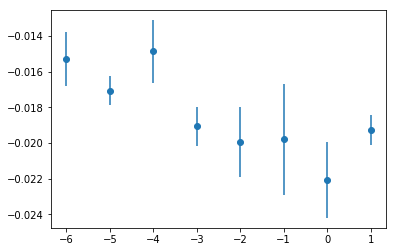

In [37]:
plt.figure()
y=np.array(df_mean)
x=np.array(x)
e=np.array(df_std)
plt.errorbar(x, y, yerr=e,  fmt='o')
plt.show()

(0.0, 5.0)


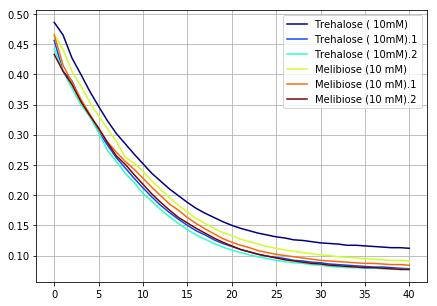

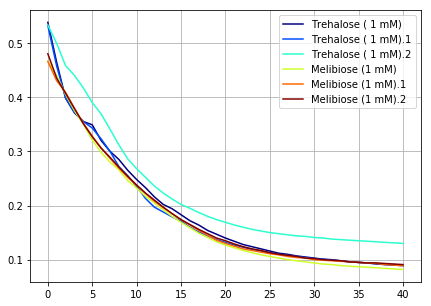

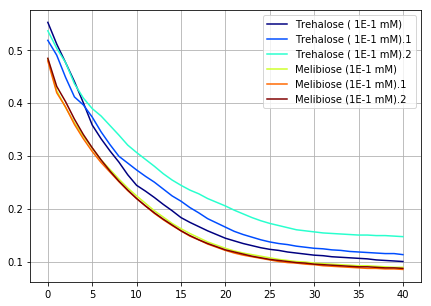

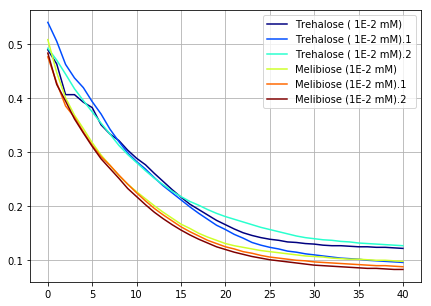

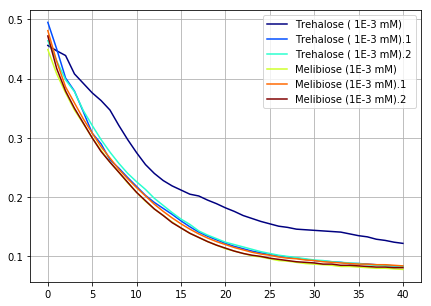

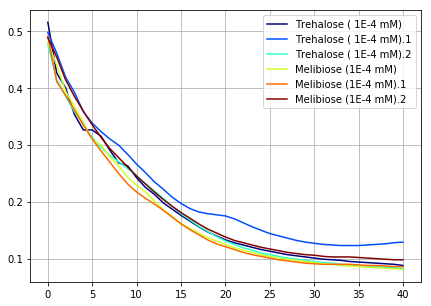

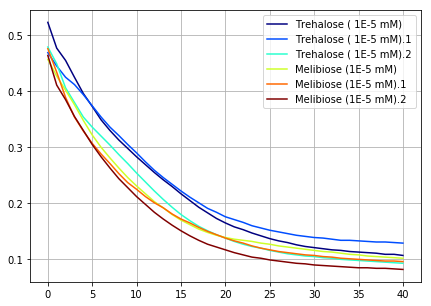

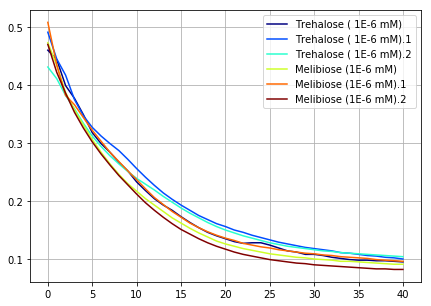

AUCS [[206.0975, 161.9975, 155.7325, 183.96, 171.99, 163.205], [191.02999999999997, 184.08249999999998, 230.54499999999996, 176.3475, 183.2425, 185.25500000000002], [198.97500000000002, 220.92000000000002, 261.87000000000006, 175.05249999999998, 169.87249999999997, 171.78000000000003], [228.77749999999997, 213.78, 236.6, 183.64499999999995, 175.19250000000002, 168.07000000000002], [236.21500000000003, 169.87250000000003, 173.6, 160.16, 167.79000000000002, 161.1925], [185.56999999999996, 220.37750000000003, 181.47500000000005, 173.4425, 169.92499999999998, 191.7475], [221.72499999999997, 237.21250000000003, 192.34250000000003, 191.51999999999998, 184.2575, 164.3075], [187.0575, 205.08249999999998, 198.1, 174.70250000000001, 187.91499999999996, 164.11499999999998]]
SLOPES [[array([-0.045 , -0.0475, -0.05  ]), array([-0.043 , -0.0465, -0.05  ]), array([-0.048 , -0.0505, -0.053 ]), array([-0.042, -0.046, -0.05 ]), array([-0.039, -0.041, -0.043]), array([-0.046 , -0.0465, -0.047 ])], [array

In [39]:
## test slope calc
from __future__ import print_function

from scipy.integrate import simps
from numpy import trapz#for j in range(1,2):
##in anaconda terminal "pip install mpld3"
%matplotlib inline
import mpld3
mpld3.enable_notebook()

 #   df_treh=raw_data2.loc[:,colnames[11:11+j*3]]
#plt.figure(figsize=(20,20)) 
NCURVES = 6
values = range(NCURVES)
#fig = plt.figure()
#plt.subplot(4,4,i)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())
AUCS=[]
SLOPES=[]
SLOPES2=[]
for i in range(1, 9):
    df1=raw_data2.loc[:,colnames[35+(i-1)*3:35+i*3]]
    df_treh=raw_data2.loc[:,colnames[11+(i-1)*3:11+i*3]]
    df=pd.concat([df_treh,df1], axis=1)
    
    plt.figure(figsize=(7,5))
    lines = []
    num=0
    AUC=[]
    slope=[]
    slope2=[]
    for column in df:

        line = df[column]
        colorVal = scalarMap.to_rgba(values[num])
        colorText = (
            '(%s)'%(column)
            )
        retLine = plt.plot(line,color=colorVal,label=column)
        lines.append(retLine)
        y = np.array(df.loc[5:, column])

        # Compute the area using the composite trapezoidal rule.
        area = trapz(y, dx=35)
        AUC.append(area)
        z = np.array(df.loc[[5,7,10], column])
        slp = np.gradient(z)
        slope.append(slp)
        slp2= (df.loc[10, column]-df.loc[5, column])/5
        slope2.append(slp2)
        num+=1
    #added this to get the legend to work
    #handles,labels = plt.get_legend_handles_labels()
    plt.legend(df.columns, loc='best')
    plt.grid()
    plt.show()
    
    #print("area =", area)

    # Compute the area using the composite Simpson's rule.
    #area = simps(y, dx=40)
    #print("area =", area)
    #print("AUC=",AUC)
    #print("slope=",slope)
    #print("slope2=",slope2)   
    AUCS.append(AUC)    
    SLOPES.append(slope)
    SLOPES2.append(slope2)
    
print("AUCS", AUCS)

print("SLOPES", SLOPES)


In [58]:
column_list=['trehalose','trehalose','trehalose','Melibiose','Melibiose','Melibiose']

In [59]:
#index_list=['10mM','1mM','0.1mM','0.01mM','0.001mM','0.0001mM','0.00001mM','0.000001mM']
index_list=[10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]

In [60]:
df_auc=pd.DataFrame(AUCS, columns=column_list, index=index_list)

In [61]:
df_auc

,trehalose,trehalose,trehalose,Melibiose,Melibiose,Melibiose
10.000000,206.0975,161.9975,155.7325,183.9600,171.9900,163.2050
1.000000,191.0300,184.0825,230.5450,176.3475,183.2425,185.2550
0.100000,198.9750,220.9200,261.8700,175.0525,169.8725,171.7800
0.010000,228.7775,213.7800,236.6000,183.6450,175.1925,168.0700
0.001000,236.2150,169.8725,173.6000,160.1600,167.7900,161.1925
0.000100,185.5700,220.3775,181.4750,173.4425,169.9250,191.7475
0.000010,221.7250,237.2125,192.3425,191.5200,184.2575,164.3075
0.000001,187.0575,205.0825,198.1000,174.7025,187.9150,164.1150


In [62]:
df_mean=df_auc.iloc[:,3:6].mean(axis=1)

In [63]:
df_mean

10.000000    173.051667
1.000000     181.615000
0.100000     172.235000
0.010000     175.635833
0.001000     163.047500
0.000100     178.371667
0.000010     180.028333
0.000001     175.577500
dtype: float64

In [64]:
df_std=df_auc.iloc[:,3:6].std(axis=1)

In [65]:
df_std

10.000000    10.418150
1.000000      4.671451
0.100000      2.619803
0.010000      7.796959
0.001000      4.139444
0.000100     11.716565
0.000010     14.090579
0.000001     11.924102
dtype: float64

In [143]:
#df_auc.iloc[7,3]='NAN'

In [164]:
#df_auc.iloc[5:6,3]='NAN'

In [165]:
#df_auc

,trehalose,trehalose,trehalose,Amygdalin,Amigdalin,Amigdalin
10.000000,165.8650,163.6950,165.5150,170.502,173.2150,175.5950
1.000000,176.6100,176.8200,181.7025,182,170.3100,175.4900
0.100000,169.3300,199.1150,180.4425,172.515,173.1275,179.0600
0.010000,183.4350,174.1950,177.6950,171.885,172.7775,170.8000
0.001000,296.8700,176.1900,166.6700,176.19,171.5700,166.9325
0.000100,165.4275,173.4600,172.4975,NAN,179.0775,177.5375
0.000010,178.6575,166.8975,173.8100,179.13,173.7050,173.6875
0.000001,173.2500,171.8150,167.6325,NAN,167.2300,177.4500


In [145]:
#df_mean[7]=df_auc.iloc[7:8,3:6].mean(axis=1)

In [166]:
#df_mean[5]=df_auc.iloc[5:6,3:6].mean(axis=1)

In [163]:
#sqrt((172.34-167.23)**2 +(177.45-172.34)**2)

7.226631303726515

In [167]:
#df_mean

10.000000    173.104167
1.000000     175.933333
0.100000     174.900833
0.010000     171.820833
0.001000     171.564167
0.000100     178.307500
0.000010     175.507500
0.000001     172.340000
dtype: float64

In [147]:
#df_std[7]=df_auc.iloc[7:8,3:6].std(axis=1)

In [168]:
#df_std[5]=df_auc.iloc[5:6,3:6].std(axis=1)

In [169]:
#df_std

10.000000    2.548058
1.000000     5.857596
0.100000     3.614940
0.010000     0.990310
0.001000     4.628753
0.000100     1.088944
0.000010     3.137189
0.000001     7.226631
dtype: float64

In [66]:
x=log10(df_mean.index)
x

Float64Index([1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0], dtype='float64')

TypeError: Object of type ndarray is not JSON serializable

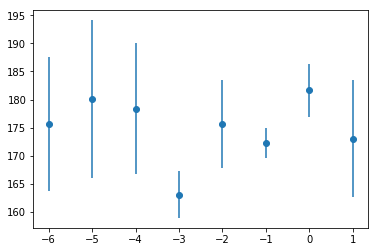

In [67]:
plt.figure()
y=np.array(df_mean)
x=np.array(x)
e=np.array(df_std)
plt.errorbar(x, y, yerr=e,  fmt='o')
plt.show()

(0.0, 5.0)


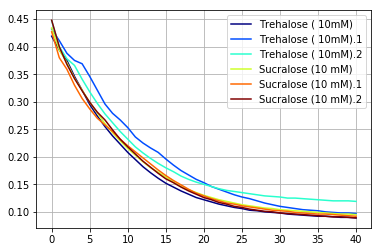

AUC= [168.20999999999998, 200.8825, 202.0025, 177.24000000000004, 176.45250000000004, 173.6]
slope= [array([-0.04  , -0.0435, -0.047 ]), array([-0.05  , -0.0465, -0.043 ]), array([-0.04 , -0.043, -0.046]), array([-0.039, -0.042, -0.045]), array([-0.029 , -0.0335, -0.038 ]), array([-0.032 , -0.0405, -0.049 ])]
slope2= [-0.017399999999999992, -0.018600000000000005, -0.017200000000000003, -0.0168, -0.013399999999999995, -0.0162]


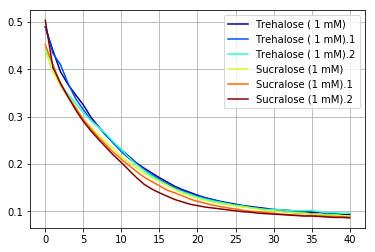

AUC= [183.715, 180.31999999999996, 181.59750000000003, 174.71999999999997, 167.66750000000002, 160.47500000000002]
slope= [array([-0.046 , -0.0475, -0.049 ]), array([-0.036 , -0.0445, -0.053 ]), array([-0.031 , -0.0395, -0.048 ]), array([-0.033 , -0.0395, -0.046 ]), array([-0.038, -0.042, -0.046]), array([-0.038 , -0.0435, -0.049 ])]
slope2= [-0.019, -0.0178, -0.015799999999999998, -0.015799999999999998, -0.0168, -0.017399999999999992]


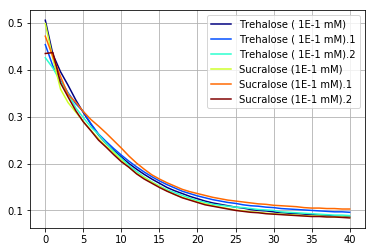

AUC= [171.0625, 179.25250000000003, 169.5925, 164.0625, 187.63499999999996, 162.4875]
slope= [array([-0.048 , -0.0475, -0.047 ]), array([-0.048 , -0.0465, -0.045 ]), array([-0.036 , -0.0435, -0.051 ]), array([-0.037 , -0.0415, -0.046 ]), array([-0.031, -0.039, -0.047]), array([-0.039 , -0.0425, -0.046 ])]
slope2= [-0.019, -0.0186, -0.017399999999999992, -0.016599999999999997, -0.015599999999999998, -0.016999999999999998]


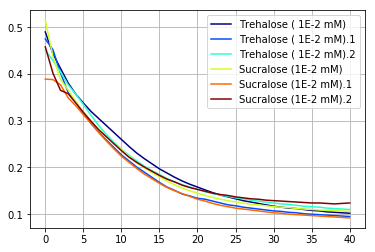

AUC= [207.58499999999998, 184.18749999999997, 203.75250000000003, 195.78999999999996, 180.58250000000004, 205.55499999999998]
slope= [array([-0.033, -0.039, -0.045]), array([-0.04  , -0.0445, -0.049 ]), array([-0.045, -0.048, -0.051]), array([-0.036, -0.04 , -0.044]), array([-0.038 , -0.0445, -0.051 ]), array([-0.037, -0.041, -0.045])]
slope2= [-0.015599999999999992, -0.017800000000000003, -0.019200000000000005, -0.015999999999999997, -0.017800000000000003, -0.016399999999999998]


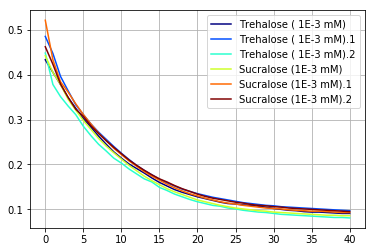

AUC= [174.98250000000002, 183.855, 160.99999999999997, 167.57999999999998, 178.29000000000002, 182.175]
slope= [array([-0.039, -0.044, -0.049]), array([-0.039, -0.043, -0.047]), array([-0.04 , -0.041, -0.042]), array([-0.04 , -0.043, -0.046]), array([-0.041 , -0.0445, -0.048 ]), array([-0.038 , -0.0415, -0.045 ])]
slope2= [-0.017599999999999998, -0.0172, -0.01639999999999999, -0.0172, -0.0178, -0.016600000000000004]


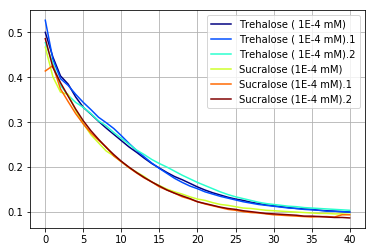

AUC= [205.1175, 206.01000000000002, 211.9775, 174.79000000000002, 169.15499999999997, 170.345]
slope= [array([-0.031, -0.037, -0.043]), array([-0.033, -0.037, -0.041]), array([-0.03  , -0.0345, -0.039 ]), array([-0.043 , -0.0425, -0.042 ]), array([-0.036, -0.042, -0.048]), array([-0.041, -0.045, -0.049])]
slope2= [-0.01479999999999999, -0.01479999999999999, -0.01379999999999999, -0.016999999999999998, -0.01680000000000001, -0.018]


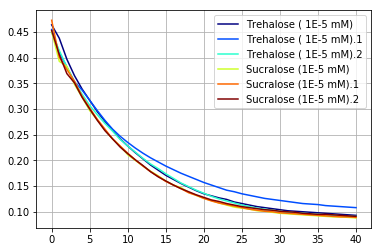

AUC= [183.68, 202.24750000000003, 181.72000000000003, 171.72750000000002, 172.3575, 174.00250000000003]
slope= [array([-0.041 , -0.0445, -0.048 ]), array([-0.039, -0.041, -0.043]), array([-0.035 , -0.0395, -0.044 ]), array([-0.038, -0.043, -0.048]), array([-0.041, -0.044, -0.047]), array([-0.042 , -0.0435, -0.045 ])]
slope2= [-0.0178, -0.016400000000000005, -0.015799999999999998, -0.017199999999999993, -0.017599999999999998, -0.0174]


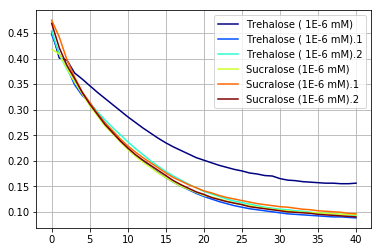

AUC= [257.33750000000003, 177.45, 188.02000000000004, 180.215, 188.685, 180.6875]
slope= [array([-0.025 , -0.0305, -0.036 ]), array([-0.04 , -0.045, -0.05 ]), array([-0.033, -0.038, -0.043]), array([-0.04 , -0.043, -0.046]), array([-0.04  , -0.0425, -0.045 ]), array([-0.04 , -0.043, -0.046])]
slope2= [-0.012199999999999999, -0.018000000000000006, -0.015200000000000002, -0.0172, -0.017000000000000005, -0.0172]
AUCS [[168.20999999999998, 200.8825, 202.0025, 177.24000000000004, 176.45250000000004, 173.6], [183.715, 180.31999999999996, 181.59750000000003, 174.71999999999997, 167.66750000000002, 160.47500000000002], [171.0625, 179.25250000000003, 169.5925, 164.0625, 187.63499999999996, 162.4875], [207.58499999999998, 184.18749999999997, 203.75250000000003, 195.78999999999996, 180.58250000000004, 205.55499999999998], [174.98250000000002, 183.855, 160.99999999999997, 167.57999999999998, 178.29000000000002, 182.175], [205.1175, 206.01000000000002, 211.9775, 174.79000000000002, 169.154999999999

In [62]:
#second compound
#plt.figure(figsize=(20,20)) 
NCURVES = 6
values = range(NCURVES)
#fig = plt.figure()
#plt.subplot(4,4,i)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
print(scalarMap.get_clim())

AUCS=[]
SLOPES=[]
SLOPES2=[]
for i in range(1, 9):
    df1=raw_data2.loc[:,colnames[59+(i-1)*3:59+i*3]]
    df_treh=raw_data2.loc[:,colnames[11+(i-1)*3:11+i*3]]
    df=pd.concat([df_treh,df1], axis=1)
    
    #plt.figure(figsize=(7,5))
    lines = []
    
    AUC=[]
    slope=[]
    slope2=[]
    num=0
    for column in df:

        line = df[column]
        colorVal = scalarMap.to_rgba(values[num])
        colorText = (
            '(%s)'%(column)
            )
        retLine = plt.plot(line,color=colorVal,label=column)
        lines.append(retLine)
        y = np.array(df.loc[5:, column])

        # Compute the area using the composite trapezoidal rule.
        area = trapz(y, dx=35)
        AUC.append(area)
        z = np.array(df.loc[[5,7,10], column])
        slp = np.gradient(z)
        slope.append(slp)
        slp2= (df.loc[10, column]-df.loc[5, column])/5
        slope2.append(slp2)
        num+=1
    #added this to get the legend to work
    #handles,labels = plt.get_legend_handles_labels()
    plt.legend(df.columns, loc='best')
    plt.grid()
    plt.show()
    
    #print("AUC=",AUC)
    #print("slope=",slope)
    #print("slope2=",slope2)   
    AUCS.append(AUC)    
    SLOPES.append(slope)
    SLOPES2.append(slope2)
    
print("AUCS", AUCS)

print("SLOPES", SLOPES)

print("SLOPES2", SLOPES2)

In [63]:
AUCS

[[168.20999999999998,
  200.8825,
  202.0025,
  177.24000000000004,
  176.45250000000004,
  173.6],
 [183.715,
  180.31999999999996,
  181.59750000000003,
  174.71999999999997,
  167.66750000000002,
  160.47500000000002],
 [171.0625,
  179.25250000000003,
  169.5925,
  164.0625,
  187.63499999999996,
  162.4875],
 [207.58499999999998,
  184.18749999999997,
  203.75250000000003,
  195.78999999999996,
  180.58250000000004,
  205.55499999999998],
 [174.98250000000002,
  183.855,
  160.99999999999997,
  167.57999999999998,
  178.29000000000002,
  182.175],
 [205.1175,
  206.01000000000002,
  211.9775,
  174.79000000000002,
  169.15499999999997,
  170.345],
 [183.68,
  202.24750000000003,
  181.72000000000003,
  171.72750000000002,
  172.3575,
  174.00250000000003],
 [257.33750000000003, 177.45, 188.02000000000004, 180.215, 188.685, 180.6875]]

In [64]:
column_list=['trehalose','trehalose','trehalose','Sucralose','Sucralose', 'Sucralose']

In [65]:
index_list=[10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]

In [66]:
df_auc=pd.DataFrame(AUCS, columns=column_list, index=index_list)

In [67]:
df_auc

,trehalose,trehalose,trehalose,Sucralose,Sucralose,Sucralose
10.000000,168.2100,200.8825,202.0025,177.2400,176.4525,173.6000
1.000000,183.7150,180.3200,181.5975,174.7200,167.6675,160.4750
0.100000,171.0625,179.2525,169.5925,164.0625,187.6350,162.4875
0.010000,207.5850,184.1875,203.7525,195.7900,180.5825,205.5550
0.001000,174.9825,183.8550,161.0000,167.5800,178.2900,182.1750
0.000100,205.1175,206.0100,211.9775,174.7900,169.1550,170.3450
0.000010,183.6800,202.2475,181.7200,171.7275,172.3575,174.0025
0.000001,257.3375,177.4500,188.0200,180.2150,188.6850,180.6875


In [68]:
df_mean=df_auc.iloc[:,3:6].mean(axis=1)
df_std=df_auc.iloc[:,3:6].std(axis=1)
x=log10(df_mean.index)
x

Float64Index([1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0], dtype='float64')

TypeError: Object of type ndarray is not JSON serializable

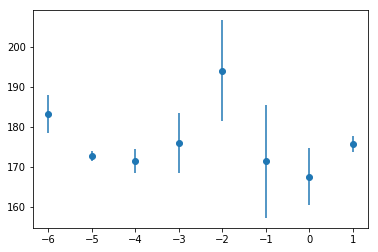

In [74]:
plt.figure()
y=np.array(df_mean)
x=np.array(x)
e=np.array(df_std)
plt.errorbar(x, y, yerr=e,fmt='o')
plt.show()

TypeError: Object of type ndarray is not JSON serializable

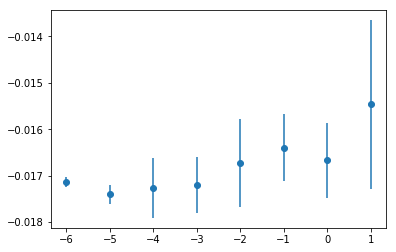

In [75]:
df_slopes2=pd.DataFrame(SLOPES2, columns=column_list, index=index_list)
df_slopes2
df_Slopes2_mean=df_slopes2.iloc[:,3:6].mean(axis=1)
df_Slopes2_std=df_slopes2.iloc[:,3:6].std(axis=1)
x=log10(df_Slopes2_mean.index)
x
plt.figure()
y=np.array(df_Slopes2_mean)
x=np.array(x)
e=np.array(df_Slopes2_std)
plt.errorbar(x, y, yerr=e,  fmt='o')
plt.show()